In [17]:
import numpy as np
import pandas as pd

from src.kMeans import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
data = np.array([[1, 1], [1, 2], [2, 2], [1.5, 1], [2.1, 1.5], [1.4, 2.2],
                 [5, 1], [5, 2], [6, 2], [5.75, 0.5], [5.5, 1.6], [5.1, 1.9],
                 [4, 5], [4, 6], [3, 5], [3.25, 4.8], [3.5, 5.4], [3.3, 5.9]
                 ])
k = 3

34.5432029909327


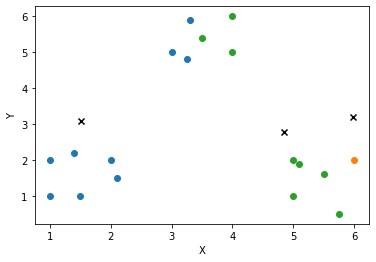

Mean:  [2.06111111 2.82222222]
Mean:  [6. 2.]
Mean:  [4.73125 2.925  ]
29.962575900504973


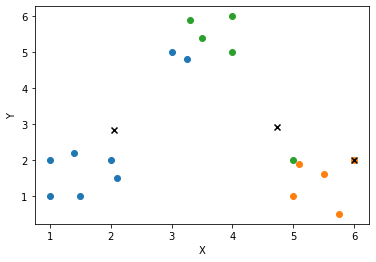

Mean:  [1.90625 2.4375 ]
Mean:  [5.47 1.4 ]
Mean:  [3.96 4.86]
15.0201900356507


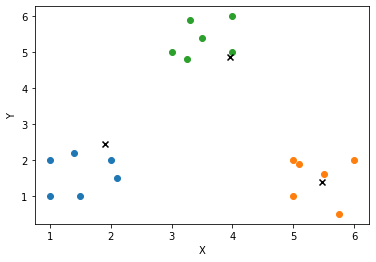

Mean:  [1.5        1.61666667]
Mean:  [5.39166667 1.5       ]
Mean:  [3.50833333 5.35      ]
10.918354601481468


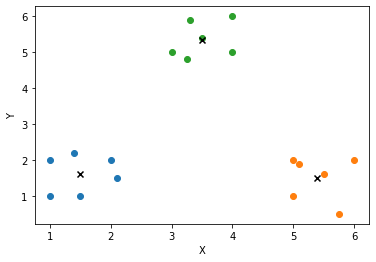

Mean:  [1.5        1.61666667]
Mean:  [5.39166667 1.5       ]
Mean:  [3.50833333 5.35      ]
10.918354601481468


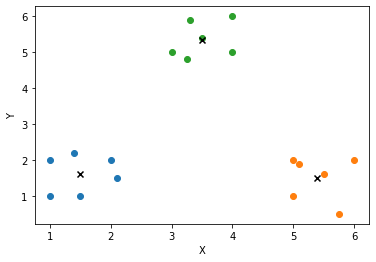

Finished after 4 iterations!


In [19]:
# own KMeans:

solver = KMeans(verbose=True)
solver.find_clusters(3, data)

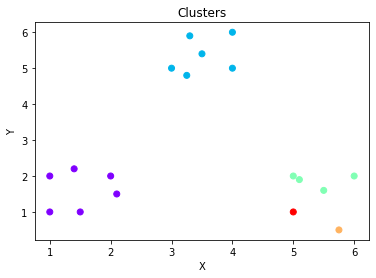

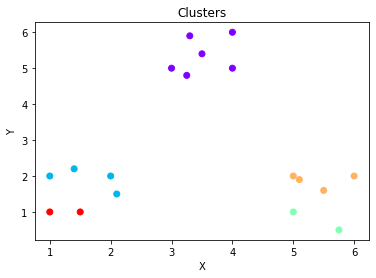

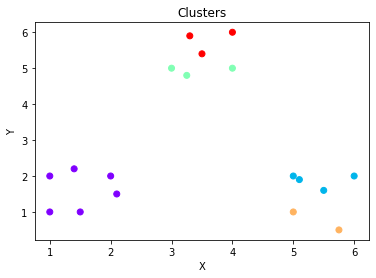

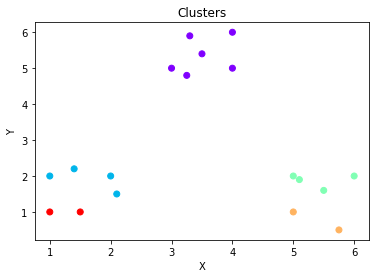

In [20]:
# Agglomerative with all linkage methods

data_pd = pd.DataFrame(data, columns=['X', 'Y'])
linkages = ['single', 'average', 'complete', 'ward']
for linkage in linkages:
    hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage =linkage)
    plt.scatter(data_pd['X'], data_pd['Y'], c = hc.fit_predict(data), cmap ='rainbow')
    plt.title("Clusters")
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.show()